In [2]:
import numpy as np
import matplotlib.pyplot as plt
loaded_data = np.load('E_field_data_combined_extended.npz' , allow_pickle=True)
# print(loaded_data)
E_data_combined = loaded_data['data']
sol =[]

for j in {0,30,60,90}:
    for k in range(-6,7):
        for l in {-1,1}:
            for i in E_data_combined:
                if(i[0] == j and i[1] == k and i[2]==l):
                    sol.append(i);
            print(len(sol))

# print(sol)

86
172
258
344
430
516
602
688
774
860
946
1032
1118
1204
1290
1376
1462
1548
1634
1720
1806
1892
1978
2064
2150
2236
2322
2408
2494
2580
2666
2752
2838
2924
3010
3096
3182
3268
3354
3440
3526
3612
3698
3784
3870
3956
4042
4128
4214
4300
4386
4472
4558
4644
4730
4816
4902
4988
5074
5160
5246
5332
5418
5504
5590
5676
5762
5848
5934
6020
6106
6192
6278
6364
6450
6536
6622
6708
6794
6880
6966
7052
7138
7224
7310
7396
7482
7568
7654
7740
7826
7912
7998
8084
8170
8256
8342
8428
8514
8600
8686
8772
8858
8944


In [3]:
sol = np.array(sol)
print(sol)
print(E_data_combined.shape)
print(sol.shape)

[[0 -6 1 0
  array([[-2.18520963e-05, -2.24809337e-05, -2.33363680e-05, ...,
          -1.32681424e-04, -1.44935586e-03, -0.00000000e+00],
         [-2.13577005e-05, -2.14424708e-05, -2.24639934e-05, ...,
          -1.32826259e-04,  6.20026956e-04, -0.00000000e+00],
         [-2.15452674e-05, -2.11950701e-05, -2.10543949e-05, ...,
          -1.33387031e-04, -4.95331733e-05, -0.00000000e+00],
         ...,
         [-2.24846772e-05, -2.21198261e-05, -2.17400848e-05, ...,
          -1.32937130e-04,  3.79619014e-04, -0.00000000e+00],
         [-2.24432733e-05,  5.15036634e-04,  6.03234337e-04, ...,
          -2.46681884e-04, -0.00000000e+00, -0.00000000e+00],
         [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
          -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])   ]
 [0 -6 1 1
  array([[-3.50327427e-05, -3.59593287e-05, -3.72569848e-05, ...,
          -2.03808333e-04, -3.22928396e-03, -0.00000000e+00],
         [-3.44028194e-05, -3.52143470e-05, -3.74597294e-05, ..

this is Update version with sol

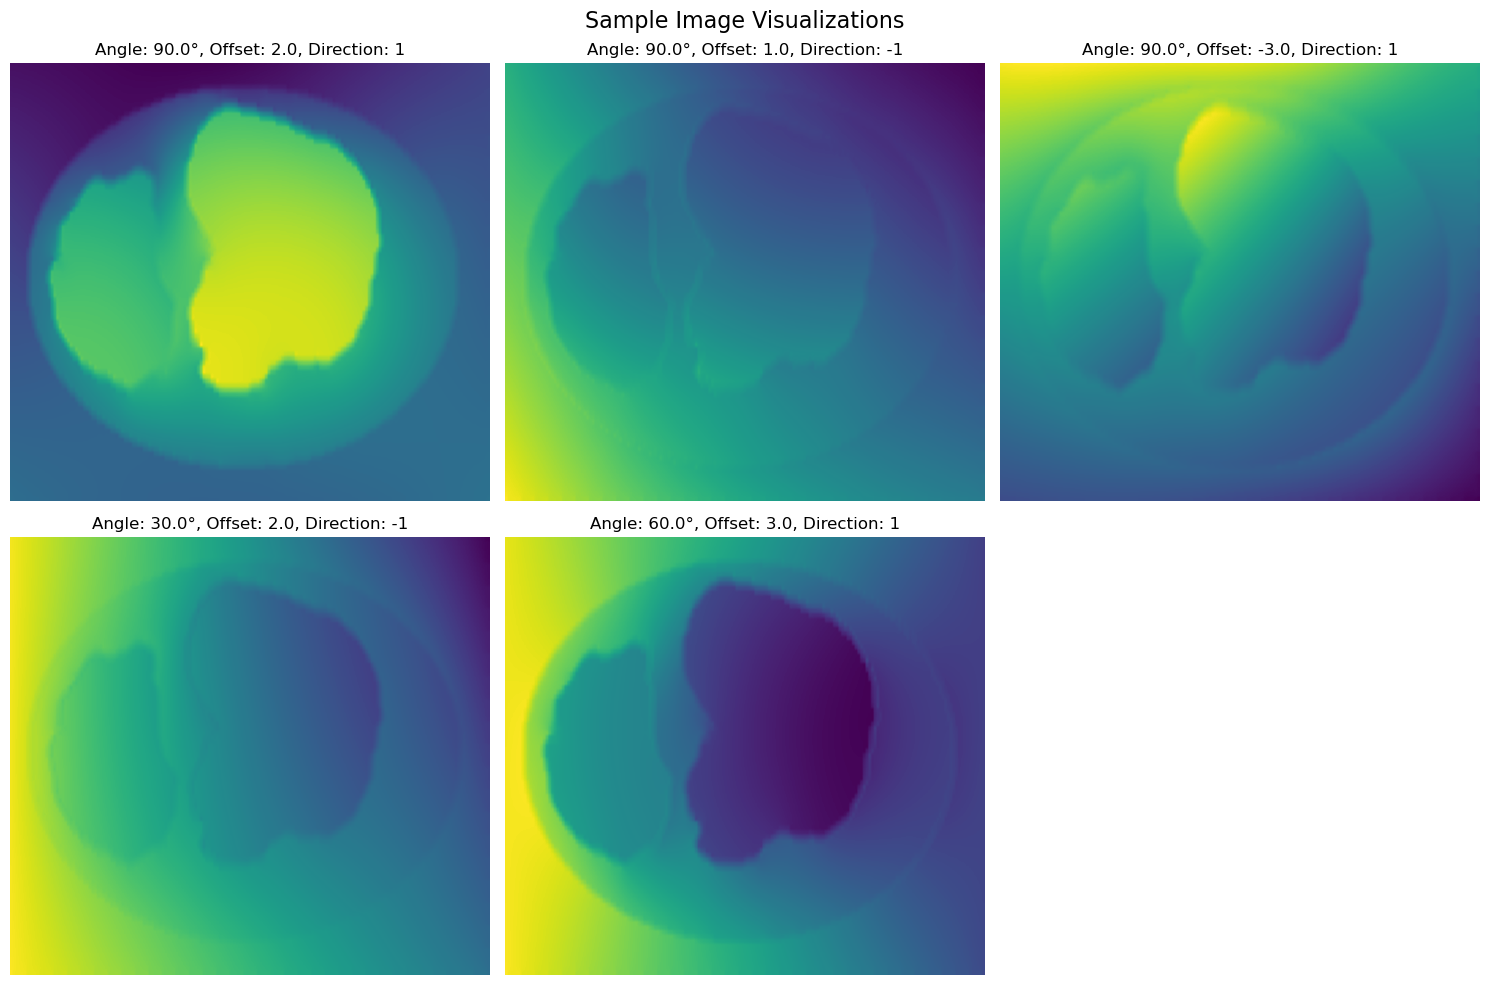

/tmp/ipykernel_1035406/1901550776.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=metadata_df["Angle"], palette="Blues")
/tmp/ipykernel_1035406/1901550776.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=metadata_df["Direction"], palette="Oranges")


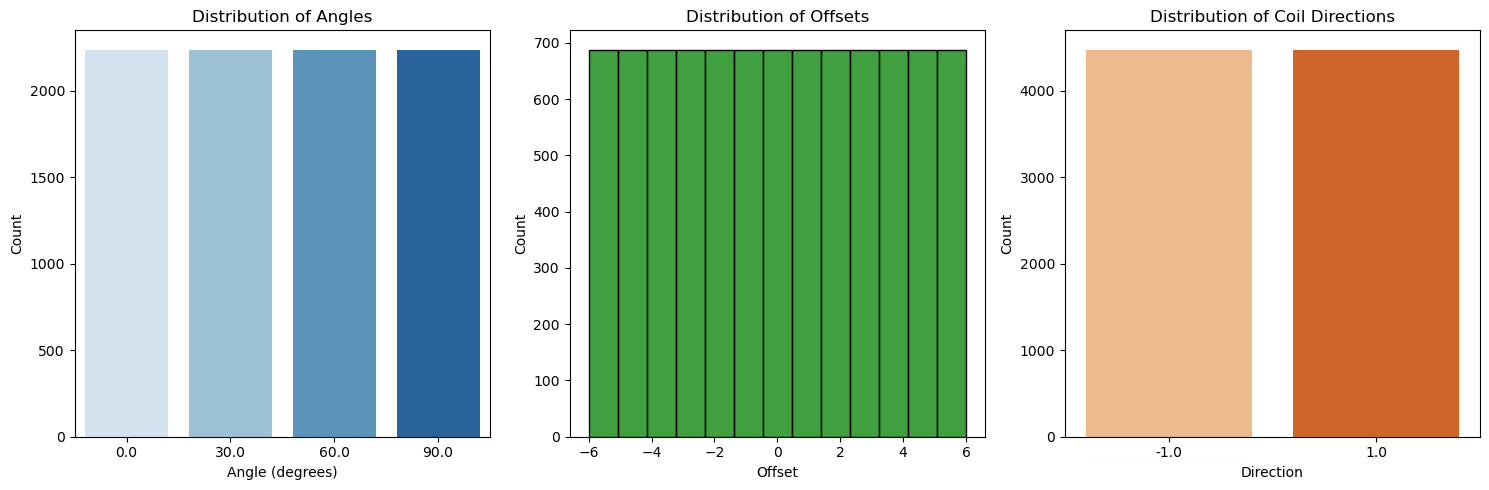

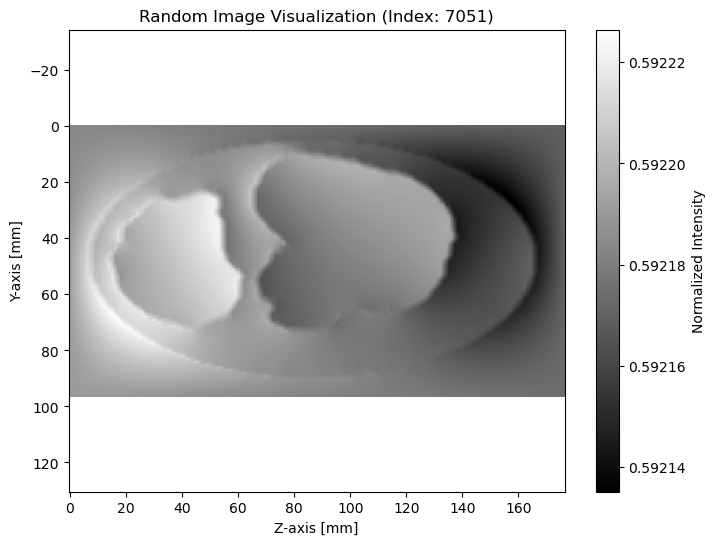

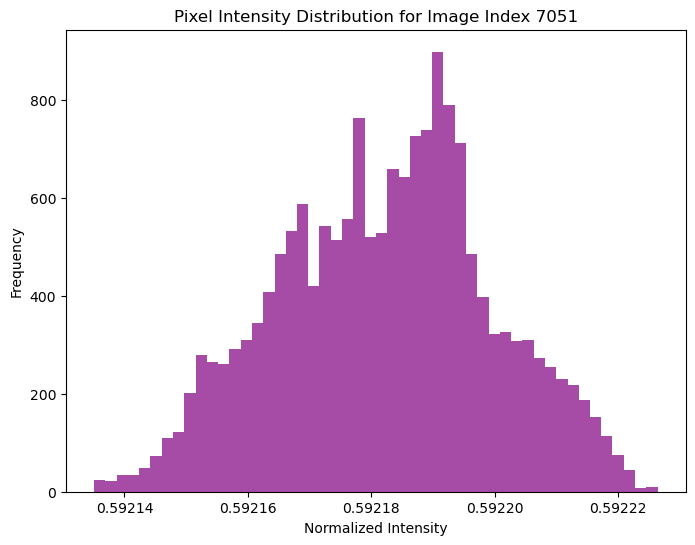

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Loading the dataset
loaded_data = np.load("E_field_data_combined_extended.npz", allow_pickle=True)
sol = loaded_data["data"]
conditions = sol[:, :-1].astype(np.float32)  # Convert feature data to float32
matrices = np.array([np.array(matrix, dtype=np.float32) for matrix in sol[:, -1]])  # Convert matrices

y_train = matrices[:, 2:99, 2:179]
y_train_min = y_train.min()
y_train_max = y_train.max()
y_train_normalized = (y_train - y_train_min) / (y_train_max - y_train_min)

# Visualize multiple sample images
num_samples_to_plot = 5  # Number of images to display
random_indices = np.random.choice(y_train_normalized.shape[0], num_samples_to_plot, replace=False)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 3, i + 1)
    plt.imshow(y_train_normalized[idx], cmap="viridis", aspect="auto")
    angle, offset, direction = conditions[idx][:3]
    plt.title(f"Angle: {angle}°, Offset: {offset}, Direction: {int(direction)}")
    plt.axis("off")
plt.suptitle("Sample Image Visualizations", fontsize=16)
plt.tight_layout()
plt.show()
import seaborn as sns
import pandas as pd

# Create a DataFrame for the metadata
metadata_df = pd.DataFrame(conditions, columns=["Angle", "Offset", "Direction", "Slice Index"])

# Visualize Angle Distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x=metadata_df["Angle"], palette="Blues")
plt.title("Distribution of Angles")
plt.xlabel("Angle (degrees)")
plt.ylabel("Count")

# Visualize Offset Distribution
plt.subplot(1, 3, 2)
sns.histplot(metadata_df["Offset"], kde=False, bins=13, color="green")
plt.title("Distribution of Offsets")
plt.xlabel("Offset")
plt.ylabel("Count")

# Visualize Direction Distribution
plt.subplot(1, 3, 3)
sns.countplot(x=metadata_df["Direction"], palette="Oranges")
plt.title("Distribution of Coil Directions")
plt.xlabel("Direction")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

# Plot the intensity distribution of one random image
selected_index = np.random.randint(0, y_train_normalized.shape[0])
selected_image = y_train_normalized[selected_index]
plt.figure(figsize=(8, 6))
plt.imshow(selected_image, cmap="gray")
plt.colorbar(label="Normalized Intensity")
plt.title(f"Random Image Visualization (Index: {selected_index})")
plt.xlabel("Z-axis [mm]")
plt.ylabel("Y-axis [mm]")
plt.axis("equal")
plt.show()

# Histogram of pixel intensity for the selected image
plt.figure(figsize=(8, 6))
plt.hist(selected_image.flatten(), bins=50, color="purple", alpha=0.7)
plt.title(f"Pixel Intensity Distribution for Image Index {selected_index}")
plt.xlabel("Normalized Intensity")
plt.ylabel("Frequency")
plt.show()


train_ranges [64 69 56 76 29 11 24 94 13 97 98 34 82 36 86 17 23 38 72 70 91 30  6 93
 77 85 87 96 41 15 54 66 61 65 39 73 53 75 74 37 22 52  9 55 89 12 32  7
 80 40 99  1 21 88 47 31 45 43 16 58 50 10 79 63 27 84 35 78 57 33  5 59]
val_ranges [ 20 102  83  19  42  60  51  18  68  44   4]
test_ranges [  0   3  90  95  14   8  81 100 103 101   2  25  26  67  28  62  92  46
  49  48  71]
[910, 2649, 3275, 2506, 2510, 6743, 123, 1896, 4991, 1123, 2551, 4352, 8429, 514, 128, 6541, 7121, 500, 1000, 775, 2801, 4747, 6641, 8130, 6010, 6347, 3107, 5499, 3299, 807, 870, 1930, 6104, 1141, 3705, 6710, 6199, 4498, 1423, 4718, 89, 4868, 4497, 2719, 8124, 2712, 5581, 8393, 4936, 983, 926, 7396, 3949, 4768, 6818, 604, 831, 2746, 8464, 8452, 4741, 575, 7378, 5055, 2605, 827, 1917, 101, 3225, 4499, 5620, 7643, 1972, 6561, 3933, 7065, 6044, 6356, 682, 156, 3735, 6276, 4656, 6205, 3196, 8411, 1941, 1826, 3526, 5948, 7286, 4907, 6363, 6899, 1305, 7308, 7505, 8010, 2969, 6837, 5560, 113, 6589, 484, 5458, 5

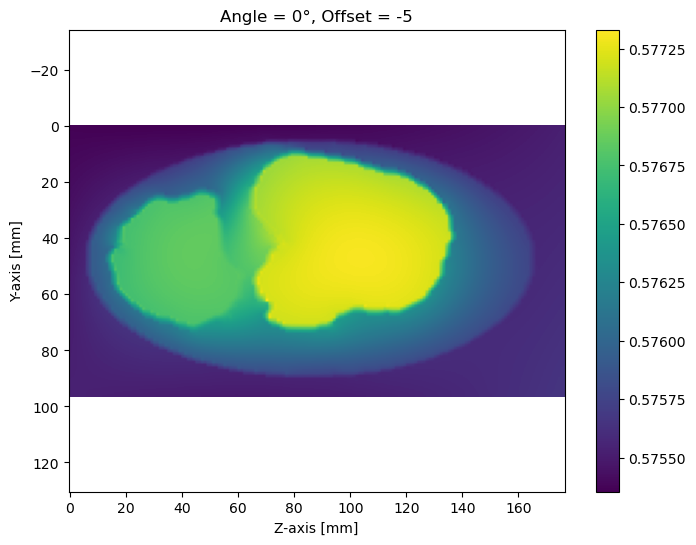

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Total number of samples and ranges
total_samples = 8944
samples_per_range = 86
num_ranges = total_samples // samples_per_range
all_ranges = np.arange(num_ranges)
np.random.shuffle(all_ranges)
train_ranges = all_ranges[:int(0.7 * num_ranges)]
val_ranges = all_ranges[int(0.7 * num_ranges):int(0.8 * num_ranges)]
test_ranges = all_ranges[int(0.8 * num_ranges): int(1.0 * num_ranges)] 
# print all ranges 
print("train_ranges" , train_ranges)
print("val_ranges" , val_ranges)
print("test_ranges" , test_ranges)
def get_indices_from_ranges(ranges, samples_per_range):
    indices = []
    for r in ranges:
        start = r * samples_per_range
        end = start + samples_per_range
        indices.extend(range(start, end))
    return indices
train_indices = get_indices_from_ranges(train_ranges, samples_per_range)
val_indices = get_indices_from_ranges(val_ranges, samples_per_range)
test_indices = get_indices_from_ranges(test_ranges, samples_per_range)
np.random.shuffle(train_indices)
np.random.shuffle(val_indices)
np.random.shuffle(test_indices)
print(train_indices)
print(val_indices)
print(test_indices)


# Assign data based on indices
X_data = sol[:, :-1].astype(np.float32)
y_data = np.array([np.array(matrix, dtype=np.float32) for matrix in sol[:, -1]])

X_train_1, y_train_1 = X_data[train_indices], y_data[train_indices]
X_val_1, y_val_1 = X_data[val_indices], y_data[val_indices]
X_test_1, y_test_1 = X_data[test_indices], y_data[test_indices]

# Normalize y data (extract submatrix and scale)
y_train_1 = y_train_1[:, 2:99, 2:179]
y_val_1 = y_val_1[:, 2:99, 2:179]
y_test_1 = y_test_1[:, 2:99, 2:179]

# Normalize per set
mini_train_1, maxi_train_1 = y_train_1.min(), y_train_1.max()
y_train_1 = (y_train_1 - mini_train_1) / (maxi_train_1 - mini_train_1)

mini_val_1, maxi_val_1 = y_val_1.min(), y_val_1.max()
y_val_1 = (y_val_1 - mini_val_1) / (maxi_val_1 - mini_val_1)

mini_test_1, maxi_test_1 = y_test_1.min(), y_test_1.max()
y_test_1 = (y_test_1 - mini_test_1) / (maxi_test_1 - mini_test_1)
# Print summary
print("Train Set:", X_train_1.shape, y_train_1.shape)
print("Validation Set:", X_val_1.shape, y_val_1.shape)
print("Test Set:", X_test_1.shape, y_test_1.shape)

# Visualization
selected_index = 89
angle, offset, direction, _, Ex_data = sol[selected_index]
a_check = y_test_1[0].flatten().reshape(97, 177)

plt.figure(figsize=(8, 6))
img = plt.imshow(a_check, cmap="viridis", aspect="auto")
plt.title(f'Angle = {angle}°, Offset = {offset}')
plt.xlabel('Z-axis [mm]')
plt.ylabel('Y-axis [mm]')
plt.axis('equal')
plt.colorbar(img)
plt.show()


In [27]:
print(mini_train_1)
print(maxi_train_1)
print(mini_test_1)
print(maxi_test_1)
print(mini_val_1)
print(maxi_val_1)

-0.9574031
0.6591242
-0.94585675
0.64943165
-0.7498225
0.6109158


## Now , we are update the code and use the the check point and droupout and earily stopping  

plot the best_model.h5 

2025-03-05 06:02:25.949271: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-05 06:02:26.029596: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.



Training with batch size: 16


2025-03-05 06:02:26.900038: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-05 06:02:27.012278: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 43575 MB memory:  -> device: 0, name: NVIDIA L40S, pci bus id: 0000:07:00.0, compute capability: 8.9


Epoch 1/1000


2025-03-05 06:02:28.206319: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2025-03-05 06:02:28.232010: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f4231aad420 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-03-05 06:02:28.232046: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA L40S, Compute Capability 8.9
2025-03-05 06:02:28.237548: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-05 06:02:28.301463: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:234] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2025-03-05 06:02:28.301498: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:237] Used ptxas at ptxas
202

173/387 [============>.................] - ETA: 3s - loss: 0.0434

385/387 [============================>.] - ETA: 0s - loss: 0.0392
Epoch 1: val_loss improved from inf to 0.05001, saving model to best_model_batch_16.keras
387/387 [==============================] - 9s 20ms/step - loss: 0.0392 - val_loss: 0.0500
Epoch 2/1000
384/387 [============================>.] - ETA: 0s - loss: 0.0357
Epoch 2: val_loss did not improve from 0.05001
387/387 [==============================] - 6s 16ms/step - loss: 0.0357 - val_loss: 0.0559
Epoch 3/1000
385/387 [============================>.] - ETA: 0s - loss: 0.0352
Epoch 3: val_loss did not improve from 0.05001
387/387 [==============================] - 6s 17ms/step - loss: 0.0353 - val_loss: 0.0566
Epoch 4/1000
385/387 [============================>.] - ETA: 0s - loss: 0.0335
Epoch 4: val_loss improved from 0.05001 to 0.04537, saving model to best_model_batch_16.keras
387/387 [==============================] - 9s 22ms/step - loss: 0.0335 - val_loss: 0.0454
Epoch 5/1000
386/387 [============================>.] - ETA

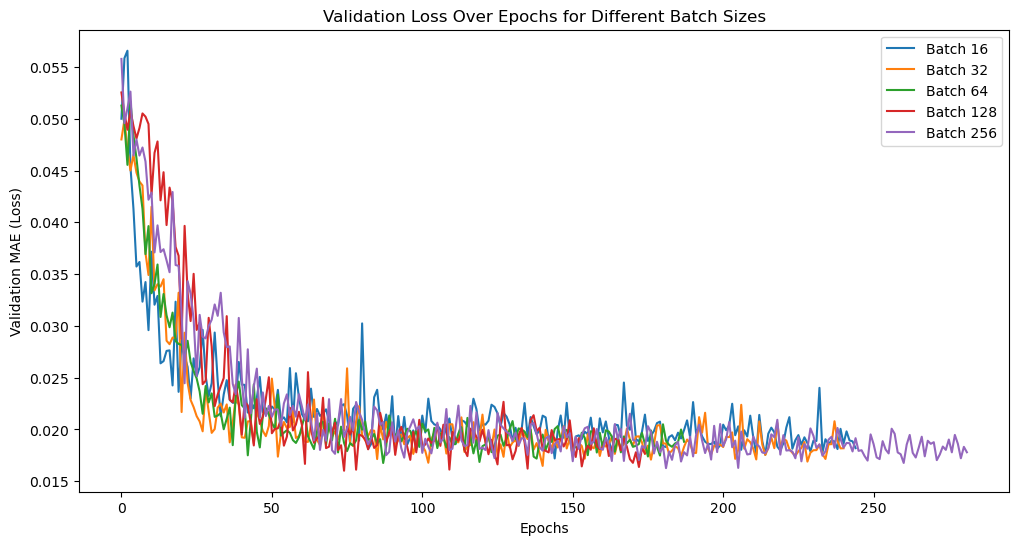

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

# Model Architecture
def model_architecture():
    alpha = 0.0  # Leaky ReLU parameter

    def dense_block(input, num_units):
        x = Dense(num_units)(input)
        x = LeakyReLU(alpha=alpha)(x)
        return x

    inputs = Input(shape=(4,), name='data')

    x = dense_block(inputs, 8)
    x = dense_block(x, 32)
    x = dense_block(x, 128)
    x = dense_block(x, 512)
    x = dense_block(x, 2048)
    x = dense_block(x, 8192)
    x = Dense(97 * 177, activation='sigmoid')(x)

    outputs = Reshape((97, 177, 1))(x)

    model = Model(inputs, outputs, name="fcn_conv")
    
    return model
train_ranges : [19 24 46 27 54 72 43 40 67  7 52 68  2 70 38 41 49 42 50 36 73 69 18  4
 26 63 74 44 76  5 75 56 65  9 53  1 77 64  0 29 15 58 51 17 16 12  6 37
 13 25 61 33 31  3 30 39 45 34 32 22 28 55 21 66 10 62  8 48 57 11]
val_ranges : [23 35 71 14 60 20 47 59]
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mae')

    # Reshape labels to match the output of the model
    y_train_reshaped = np.expand_dims(y_train_1, axis=-1)
    y_val_reshaped = np.expand_dims(y_val_1, axis=-1)

    # Define callbacks
    checkpoint = ModelCheckpoint(f'best_model_batch_{batch_size}.keras', monitor='val_loss', save_best_only=True, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True, verbose=1)

    # Train model
    history = model.fit(
        X_train_1, y_train_reshaped,
        validation_data=(X_val_1, y_val_reshaped),
        epochs=1000, batch_size=batch_size, verbose=1,
        callbacks=[checkpoint, early_stopping]
    )

    return history

# List of batch sizes to test
batch_sizes = [16, 32, 64, 128, 256]

# Dictionary to store histories
histories = {}

# Train the model with different batch sizes
for batch_size in batch_sizes:
    histories[batch_size] = train_with_batch_size(batch_size)

# Plot loss for different batch sizes
plt.figure(figsize=(12, 6))
for batch_size, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'Batch {batch_size}')

plt.title('Validation Loss Over Epochs for Different Batch Sizes')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE (Loss)')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


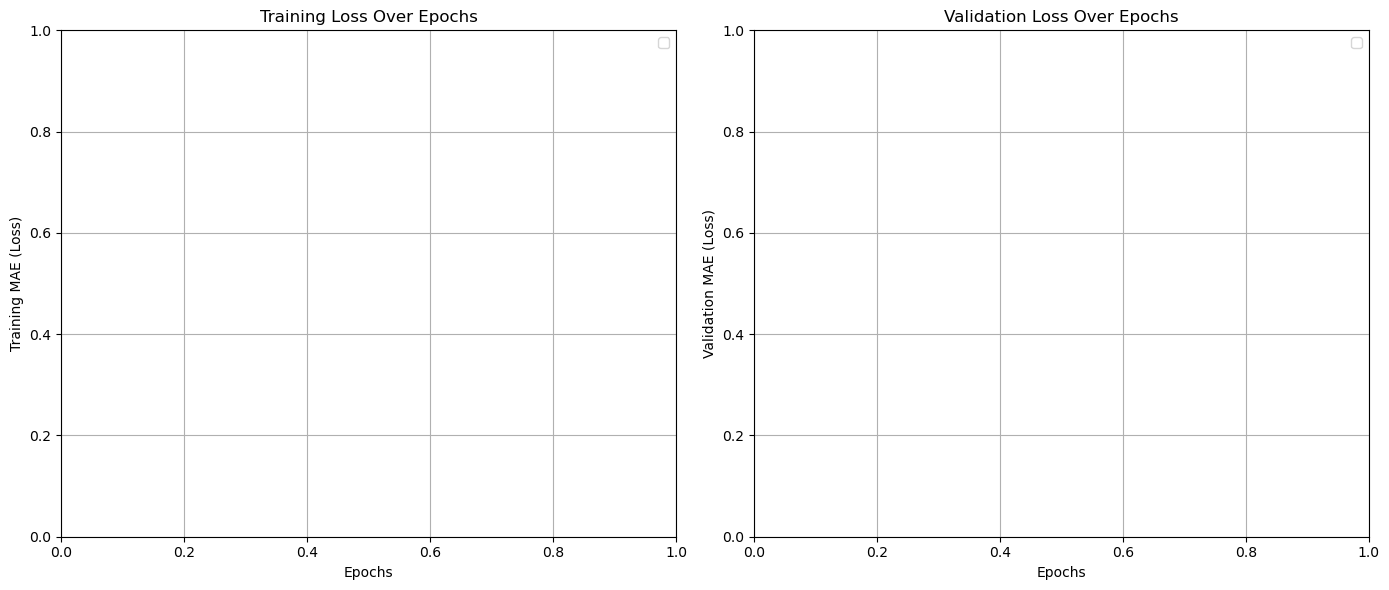

In [10]:
import matplotlib.pyplot as plt

# Create two plots: one for training loss, one for validation loss
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Training Loss
axes[0].set_title('Training Loss Over Epochs')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Training MAE (Loss)')
for batch_size, history in histories.items():
    axes[0].plot(history.history['loss'], label=f'Batch {batch_size}')
axes[0].legend()
axes[0].grid(True)

# Plot Validation Loss
axes[1].set_title('Validation Loss Over Epochs')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Validation MAE (Loss)')
for batch_size, history in histories.items():
    axes[1].plot(history.history['val_loss'], label=f'Batch {batch_size}')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense, LeakyReLU
# from tensorflow.keras.regularizers import l2
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# import numpy as np
# import matplotlib.pyplot as plt

# # Define the Dense block
# def dense_block(input, num_units, alpha=0.0):
#     x = Dense(num_units, kernel_regularizer=l2(0.001))(input)
#     x = LeakyReLU(alpha=alpha)(x)
#     return x

# # Model Architecture
# def model_architecture(input_shape=(X_train_1.shape[1],)):
#     inputs = Input(shape=input_shape)
#     x = dense_block(inputs, 4)          # Input layer
#     x = dense_block(x, 2**5)
#     x = dense_block(x, 2**7)
#     x = dense_block(x, 2**9)
#     x = dense_block(x, 2**11)
#     x = dense_block(x, 2**13)
#     outputs = Dense(17169, activation='sigmoid')(x)  # Output layer
#     model = Model(inputs, outputs)
#     return model

# # Build the model
# model = model_architecture()

# # Compile the model with learning_rate=0.001 and loss='mae'
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae')

# # Define callbacks
# checkpoint = ModelCheckpoint('best_model_linear_update.h5', monitor='val_loss', save_best_only=True, verbose=1, mode='min')
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# # Model summary
# model.summary()

# # Reshape target values for training and validation
# y_train_flat = np.array([y.reshape(-1) for y in y_train_1])
# y_val_flat = np.array([y.reshape(-1) for y in y_val_1])

# # Train the model
# history = model.fit(X_train_1, y_train_flat,
#                     validation_data=(X_val_1, y_val_flat),
#                     epochs=100, batch_size=16, verbose=1,
#                     callbacks=[checkpoint, early_stopping])

# # Plotting training history
# def plot_history(history):
#     plt.figure(figsize=(16, 6))  # Increased width for the plot
    
#     # Plot Loss
#     plt.plot(history.history['loss'], label='Train Loss')
#     plt.plot(history.history['val_loss'], label='Validation Loss')
#     plt.title('Loss Over Epochs')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.grid(axis='y', linestyle='--', alpha=0.7)
#     plt.show()

# # Plot training history
# plot_history(history)


In [6]:
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('best_model_batch_16.keras')

# Make predictions
y_pred_best_model = model.predict(X_test_1)

# Ensure both y_test_1 and y_pred_best_model have the same shape
y_pred_best_model_squeezed = np.squeeze(y_pred_best_model)  # Remove the extra dimension (97, 177, 1) -> (97, 177)

# Calculate MAE for each sample and its variance
err = np.array([np.mean(np.abs(y_test_1[i, ...] - y_pred_best_model_squeezed[i, ...])) for i in range(y_test_1.shape[0])])
test_mae = np.mean(err)
test_variance = np.var(err)

# Print the results
print("Test MAE (using per-sample mean absolute error):", test_mae)
print("Variance of MAE across samples:", test_variance)


11/57 [====>.........................] - ETA: 0s

2025-03-06 03:24:54.760946: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


57/57 [==============================] - 1s 10ms/step
Test MAE (using per-sample mean absolute error): 0.0414877
Variance of MAE across samples: 0.0056125456


In [7]:
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('best_model_batch_32.keras')

# Make predictions
y_pred_best_model = model.predict(X_test_1)

# Ensure both y_test_1 and y_pred_best_model have the same shape
y_pred_best_model_squeezed = np.squeeze(y_pred_best_model)  # Remove the extra dimension (97, 177, 1) -> (97, 177)

# Calculate MAE for each sample and its variance
err = np.array([np.mean(np.abs(y_test_1[i, ...] - y_pred_best_model_squeezed[i, ...])) for i in range(y_test_1.shape[0])])
test_mae = np.mean(err)
test_variance = np.var(err)

# Print the results
print("Test MAE (using per-sample mean absolute error):", test_mae)
print("Variance of MAE across samples:", test_variance)


57/57 [==============================] - 1s 9ms/step
Test MAE (using per-sample mean absolute error): 0.012920006
Variance of MAE across samples: 0.00029635773


In [8]:
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('best_model_batch_64.keras')

# Make predictions
y_pred_best_model = model.predict(X_test_1)

# Ensure both y_test_1 and y_pred_best_model have the same shape
y_pred_best_model_squeezed = np.squeeze(y_pred_best_model)  # Remove the extra dimension (97, 177, 1) -> (97, 177)

# Calculate MAE for each sample and its variance
err = np.array([np.mean(np.abs(y_test_1[i, ...] - y_pred_best_model_squeezed[i, ...])) for i in range(y_test_1.shape[0])])
test_mae = np.mean(err)
test_variance = np.var(err)

# Print the results
print("Test MAE (using per-sample mean absolute error):", test_mae)
print("Variance of MAE across samples:", test_variance)


57/57 [==============================] - 1s 10ms/step
Test MAE (using per-sample mean absolute error): 0.01016137
Variance of MAE across samples: 9.163528e-05


In [9]:
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('best_model_batch_128.keras')

# Make predictions
y_pred_best_model = model.predict(X_test_1)

# Ensure both y_test_1 and y_pred_best_model have the same shape
y_pred_best_model_squeezed = np.squeeze(y_pred_best_model)  # Remove the extra dimension (97, 177, 1) -> (97, 177)

# Calculate MAE for each sample and its variance
err = np.array([np.mean(np.abs(y_test_1[i, ...] - y_pred_best_model_squeezed[i, ...])) for i in range(y_test_1.shape[0])])
test_mae = np.mean(err)
test_variance = np.var(err)

# Print the results
print("Test MAE (using per-sample mean absolute error):", test_mae)
print("Variance of MAE across samples:", test_variance)


57/57 [==============================] - 1s 10ms/step
Test MAE (using per-sample mean absolute error): 0.012515366
Variance of MAE across samples: 9.410921e-05


In [10]:
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('best_model_batch_256.keras')

# Make predictions
y_pred_best_model = model.predict(X_test_1)

# Ensure both y_test_1 and y_pred_best_model have the same shape
y_pred_best_model_squeezed = np.squeeze(y_pred_best_model)  # Remove the extra dimension (97, 177, 1) -> (97, 177)

# Calculate MAE for each sample and its variance
err = np.array([np.mean(np.abs(y_test_1[i, ...] - y_pred_best_model_squeezed[i, ...])) for i in range(y_test_1.shape[0])])
test_mae = np.mean(err)
test_variance = np.var(err)

# Print the results
print("Test MAE (using per-sample mean absolute error):", test_mae)
print("Variance of MAE across samples:", test_variance)


57/57 [==============================] - 1s 10ms/step
Test MAE (using per-sample mean absolute error): 0.011649276
Variance of MAE across samples: 0.000120344666


## now , we makeing dataset with conactinate with desirable image 

In [ ]:
import numpy as np
loaded_nerve = np.load('nerve_2D_cross_section.npy')
loaded_nerve = loaded_nerve[2:99, 2:179]
print(loaded_nerve.min())
print(loaded_nerve.max())
print("Loaded nerve shape:", loaded_nerve.shape)

1.0
5.0
Loaded nerve shape: (97, 177)


In [ ]:
# for i in loaded_nerve:
#     print(i)
loaded_nerve_mini = loaded_nerve.min()
loaded_nerve_max = loaded_nerve.max()

loaded_nerve = (loaded_nerve - loaded_nerve_mini) / (loaded_nerve_max - loaded_nerve_mini)

print(loaded_nerve.min())
print(loaded_nerve.max())

0.0
1.0


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
model = load_model('best_model_upsampling_update_1.keras')
model.summary()
y_pred_best_model = model.predict(X_train_1)
x_val= model.predict(X_val_1)
x_test = model.predict(X_test_1)

print(y_pred_best_model.shape)
y_pred_flat = y_pred_best_model.reshape(6708,97,177)
x_val = x_val.reshape(1341,97,177)
x_test= x_test.reshape(895,97,177)
print(y_pred_flat.shape)


Model: "fcn_conv"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data (InputLayer)           [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 8)                 40        
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 32)                288       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               4224      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 128)               0  

ValueError: cannot reshape array of size 22148010 into shape (1341,97,177)

In [ ]:
import numpy as np
reshaped_matrices = y_pred_flat.reshape(y_pred_best_model.shape[0], -1)
is_identical = np.all(reshaped_matrices == reshaped_matrices[0], axis=1)
all_matrices_identical = np.all(is_identical)
print(f"Are all matrices inside `y_pred_best_model` identical? {all_matrices_identical}")
if not all_matrices_identical:
    differing_indices = np.where(is_identical == False)[0]
    print(f"Matrices at these indices differ: {differing_indices}")
if not all_matrices_identical:
    for index in differing_indices:
        print(f"Matrix {index} differs from the first matrix.")


Are all matrices inside `y_pred_best_model` identical? False
Matrices at these indices differ: [   1    2    3 ... 6705 6706 6707]
Matrix 1 differs from the first matrix.
Matrix 2 differs from the first matrix.
Matrix 3 differs from the first matrix.
Matrix 4 differs from the first matrix.
Matrix 5 differs from the first matrix.
Matrix 6 differs from the first matrix.
Matrix 7 differs from the first matrix.
Matrix 8 differs from the first matrix.
Matrix 9 differs from the first matrix.
Matrix 10 differs from the first matrix.
Matrix 11 differs from the first matrix.
Matrix 12 differs from the first matrix.
Matrix 13 differs from the first matrix.
Matrix 14 differs from the first matrix.
Matrix 15 differs from the first matrix.
Matrix 16 differs from the first matrix.
Matrix 17 differs from the first matrix.
Matrix 18 differs from the first matrix.
Matrix 19 differs from the first matrix.
Matrix 20 differs from the first matrix.
Matrix 21 differs from the first matrix.
Matrix 22 differs

In [ ]:
print(y_pred_flat.shape)

(6708, 97, 177)


In [ ]:
new_dataset = []
for pred in y_pred_flat:
    concatenated_image = np.stack((pred, loaded_nerve), axis=-1)
    new_dataset.append(concatenated_image)
new_dataset = np.array(new_dataset)
np.save('new_image_dataset.npy', new_dataset)
print("New dataset shape:", new_dataset.shape)


New dataset shape: (6708, 97, 177, 2)


In [ ]:
new_val = []
for pred in x_val:
    concatenated_image = np.stack((pred, loaded_nerve), axis=-1)
    new_val.append(concatenated_image)
new_val = np.array(new_val)
np.save('new_val_dataset.npy', new_val)
print("New dataset shape:", new_val.shape)


New dataset shape: (1341, 97, 177, 2)


In [ ]:
new_test = []
for pred in x_test:
    concatenated_image = np.stack((pred, loaded_nerve), axis=-1)
    new_test.append(concatenated_image)
new_test = np.array(new_test)
np.save('new_test_dataset.npy', new_test)
print("New dataset shape:", new_test.shape)


New dataset shape: (895, 97, 177, 2)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, ZeroPadding2D
from tensorflow.keras.models import Model
import numpy as np

# Load the new dataset
new_dataset = np.load('new_image_dataset.npy')
print("New dataset shape:", new_dataset.shape)
X_train = new_dataset 
Y_train = y_train_1  
Y_train = np.expand_dims(Y_train, axis=-1)
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)

New dataset shape: (6708, 97, 177, 2)
X_train shape: (6708, 97, 177, 2)
Y_train shape: (6708, 97, 177, 1)


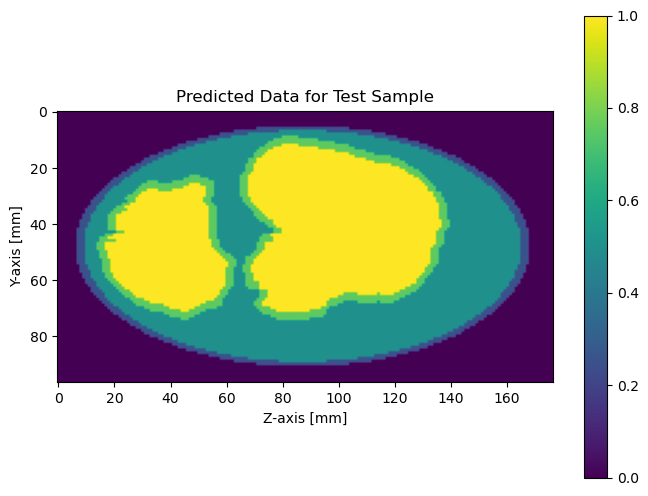

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 6))
img_pred = plt.imshow(X_train[0,:,:,1], cmap='viridis')  # Plot predicted data slice
plt.title(f'Predicted Data for Test Sample')
plt.xlabel('Z-axis [mm]')
plt.ylabel('Y-axis [mm]')
plt.colorbar(img_pred)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model
import numpy as np

# Load the new dataset
new_dataset = np.load('new_image_dataset.npy')
print("New dataset shape:", new_dataset.shape)
new_val= np.load('new_val_dataset.npy')
new_test = np.load('new_test_dataset.npy')

# Define input (X) and output (Y) from the dataset
X_train = new_dataset
Y_train = y_train_1
X_val = new_val
X_test = new_test
Y_val = y_val_1
Y_test = y_test_1
Y_train = np.expand_dims(Y_train, axis=-1)
Y_val = np.expand_dims(Y_val , axis=-1)
Y_test = np.expand_dims(Y_test , axis =-1)
print("Original X_train shape:", X_train.shape)
print("Original Y_train shape:", Y_train.shape)

# Resize X_train and Y_train to (96, 176)
X_train_resized = tf.image.resize(X_train, [96, 176]).numpy()
Y_train_resized = tf.image.resize(Y_train, [96, 176]).numpy()
X_val_resized = tf.image.resize(X_val, [96, 176]).numpy()
Y_val_resized = tf.image.resize(Y_val, [96, 176]).numpy()
X_test_resized = tf.image.resize(X_test, [96, 176]).numpy()
Y_test_resized = tf.image.resize(Y_test, [96, 176]).numpy()
print("Resized X_train shape:", X_train_resized.shape)
print("Resized Y_train shape:", Y_train_resized.shape)
print("Resized X_val shape:", X_val_resized.shape)
print("Resized Y_val shape:", Y_val_resized.shape)
print("Resized X_test shape:", X_test_resized.shape)
print("Resized Y_test shape:", Y_test_resized.shape)


New dataset shape: (6708, 97, 177, 2)
Original X_train shape: (6708, 97, 177, 2)
Original Y_train shape: (6708, 97, 177, 1)
Resized X_train shape: (6708, 96, 176, 2)
Resized Y_train shape: (6708, 96, 176, 1)
Resized X_val shape: (1341, 96, 176, 2)
Resized Y_val shape: (1341, 96, 176, 1)
Resized X_test shape: (895, 96, 176, 2)
Resized Y_test shape: (895, 96, 176, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def unet_image_reconstruction(input_shape=(96, 176, 2)):
    inputs = layers.Input(input_shape)
    
    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)
    
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)
    
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)
    
    # Bottleneck
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    
    # Decoder
    u5 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c4)
    u5 = layers.concatenate([u5, c3])
    c5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c5)
    
    u6 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c2])
    c6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c6)
    
    u7 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c1])
    c7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c7)
    
    # Single channel output for reconstruction
    outputs = layers.Conv2D(1, (1, 1), activation='linear')(c7)  # Use 'linear' for reconstruction
    
    model = models.Model(inputs, outputs)
    return model


In [ ]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 96, 176, 2)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_90 (Conv2D)             (None, 96, 176, 64)  1216        ['input_7[0][0]']                
                                                                                                  
 conv2d_91 (Conv2D)             (None, 96, 176, 64)  36928       ['conv2d_90[0][0]']              
                                                                                                  
 max_pooling2d_18 (MaxPooling2D  (None, 48, 88, 64)  0           ['conv2d_91[0][0]']        

In [ ]:
print("X_train_resized shape:", X_train_resized.shape)  # Should be (num_samples, 96, 176, 2)
print("Y_train_resized shape:", Y_train_resized.shape)  # Should be (num_samples, 96, 176, 1)

X_train_resized = X_train_resized.astype('float32')
Y_train_resized = Y_train_resized.astype('float32')
X_val_resized = X_train_resized.astype('float32')
Y_val_resized = Y_train_resized.astype('float32')
X_test_resized = X_train_resized.astype('float32')
Y_test_resized = Y_train_resized.astype('float32')


X_train_resized shape: (6708, 96, 176, 2)
Y_train_resized shape: (6708, 96, 176, 1)


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model = unet_image_reconstruction(input_shape=(96, 176, 2))
model.compile(optimizer=Adam(learning_rate=1e-4), 
              loss='mean_squared_error', 
              metrics=['mae'])

# Define callbacks
callbacks = [
    EarlyStopping(patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint('unet_reconstruction_best_model.h5', save_best_only=True, verbose=1)
]

# Fit the model
history = model.fit(
    X_train_resized, Y_train_resized,
    batch_size=8,  # Reduce batch size
    epochs=25,
    validation_split=0.1,
    callbacks=callbacks
)
# Save the final model
model.save('unet_reconstruction_final_model.h5')

Epoch 1/25


2024-12-08 19:05:45.885743: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x93ced890 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-12-08 19:05:45.885778: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA L40S, Compute Capability 8.9
2024-12-08 19:05:45.890017: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-08 19:05:45.952423: W tensorflow/compiler/xla/service/gpu/nvptx_compiler.cc:281] Couldn't read CUDA driver version.
2024-12-08 19:05:45.953134: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


755/755 [==============================] - ETA: 0s - loss: 0.0039 - mae: 0.0227
Epoch 1: val_loss improved from inf to 0.00037, saving model to unet_reconstruction_best_model.h5
755/755 [==============================] - 14s 14ms/step - loss: 0.0039 - mae: 0.0227 - val_loss: 3.7137e-04 - val_mae: 0.0150
Epoch 2/25
753/755 [============================>.] - ETA: 0s - loss: 3.3356e-04 - mae: 0.0116
Epoch 2: val_loss improved from 0.00037 to 0.00026, saving model to unet_reconstruction_best_model.h5
755/755 [==============================] - 14s 18ms/step - loss: 3.3401e-04 - mae: 0.0116 - val_loss: 2.6217e-04 - val_mae: 0.0100
Epoch 3/25
755/755 [==============================] - ETA: 0s - loss: 3.1235e-04 - mae: 0.0111
Epoch 3: val_loss did not improve from 0.00026
755/755 [==============================] - 19s 25ms/step - loss: 3.1235e-04 - mae: 0.0111 - val_loss: 4.2073e-04 - val_mae: 0.0167
Epoch 4/25
755/755 [==============================] - ETA: 0s - loss: 3.0485e-04 - mae: 0.0107

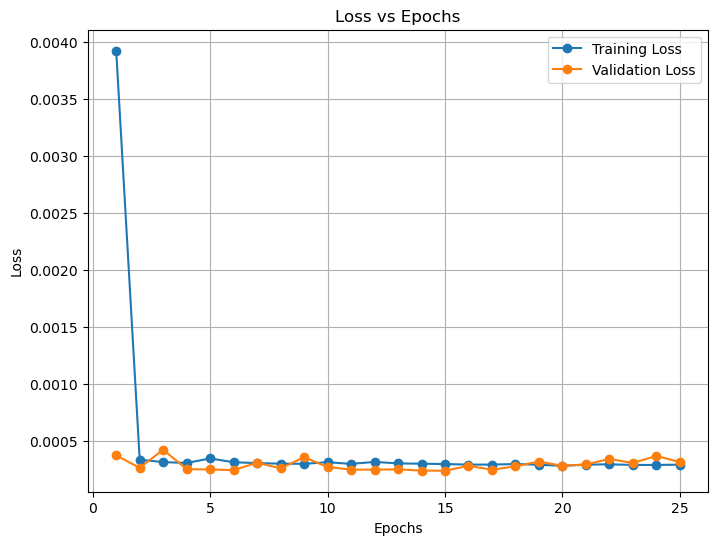

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


210/210 [==============================] - 3s 15ms/step
Test MAE (using per-sample mean absolute error): 0.008185801
Variance of MAE across samples: 0.00014155002


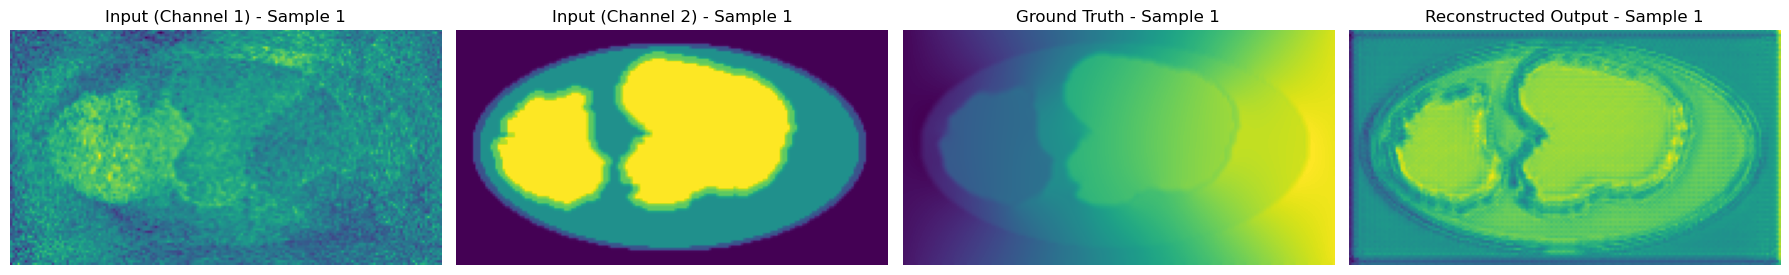

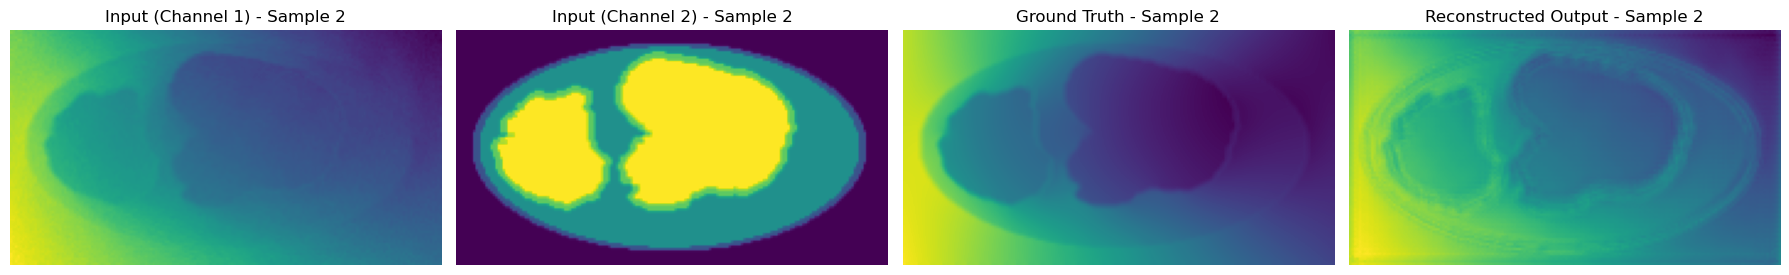

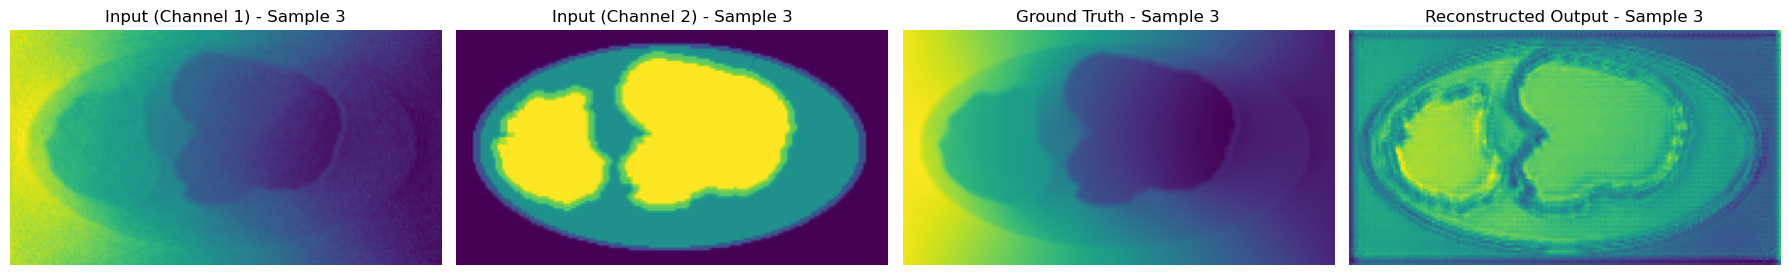

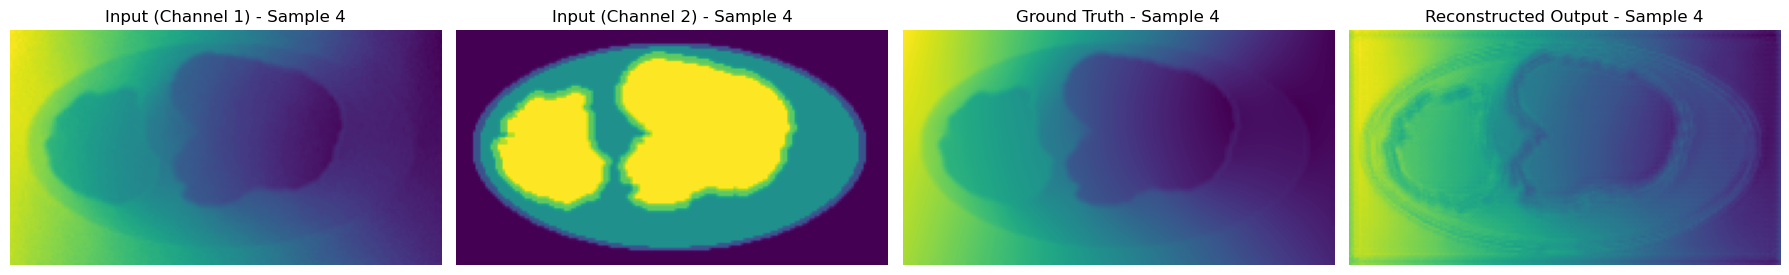

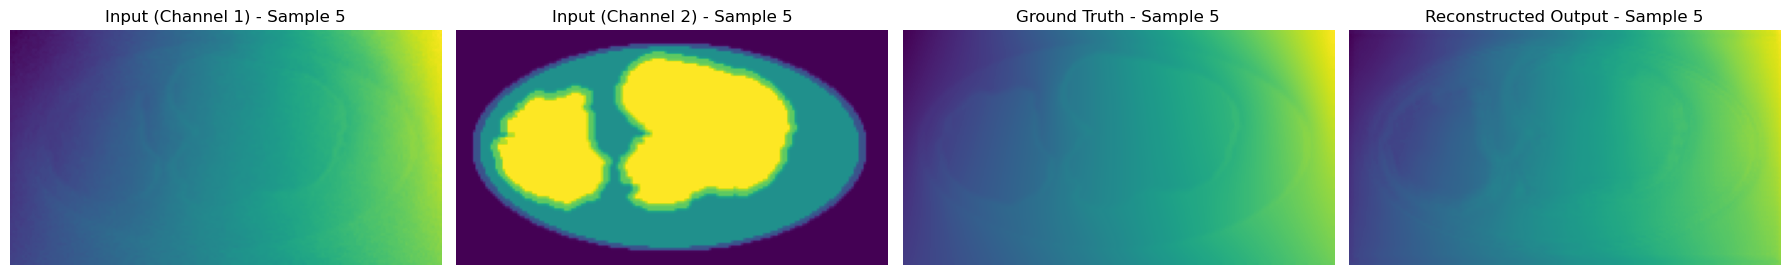

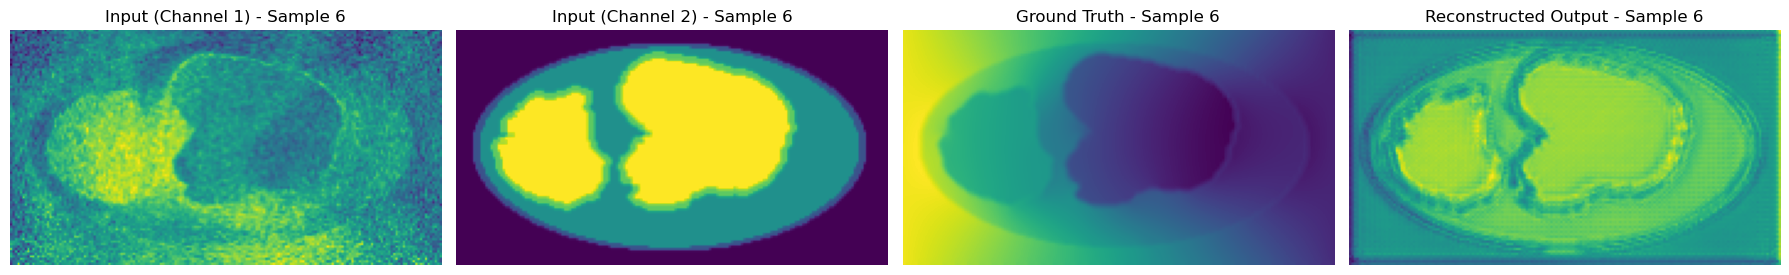

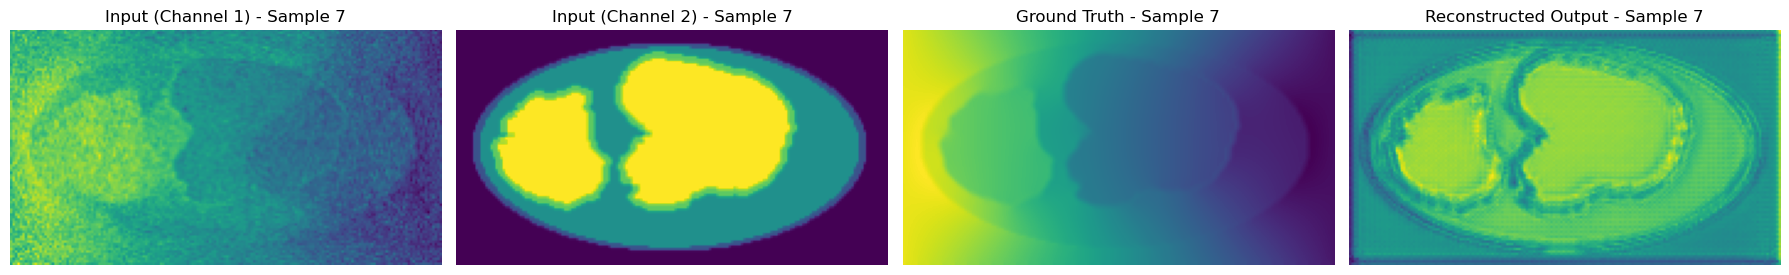

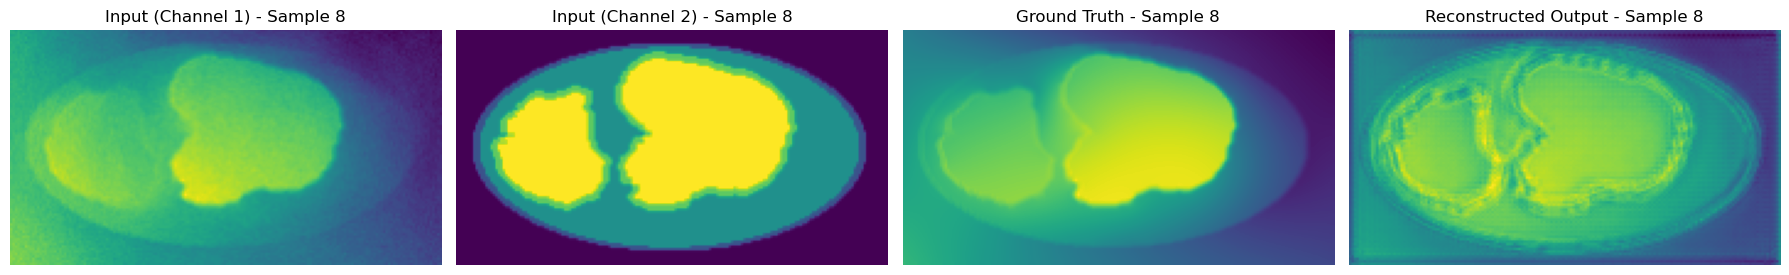

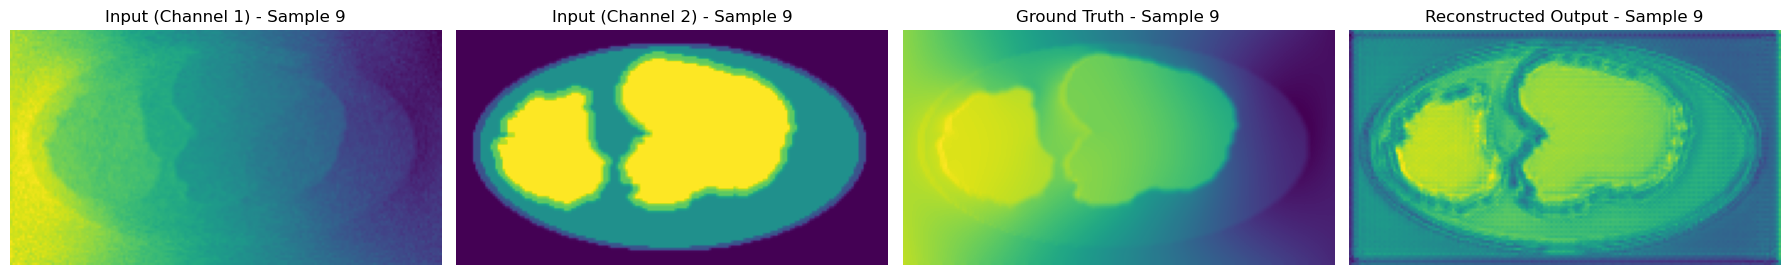

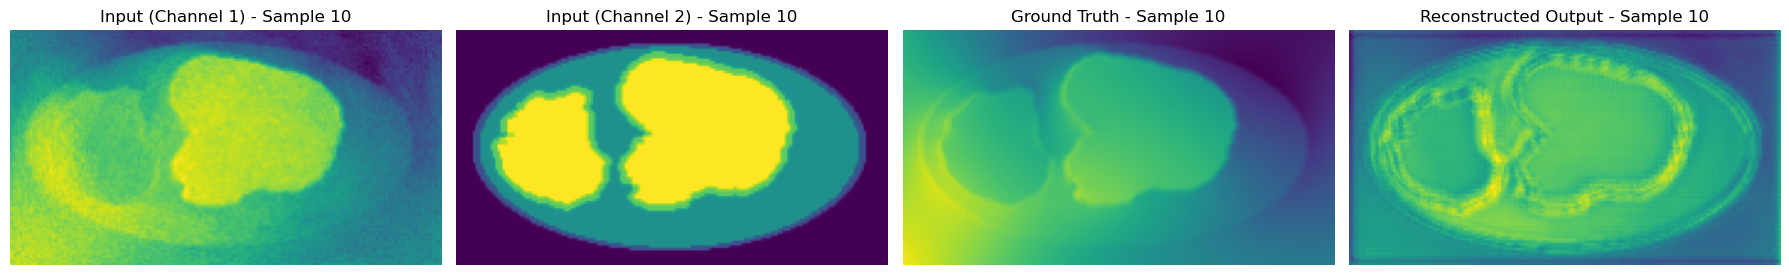

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('unet_reconstruction_final_model.h5')

# Predict on the test dataset
predicted_test = model.predict(X_test_resized)

# Calculate MAE for each sample and its variance
err = np.array([np.mean(np.abs(Y_test_resized[i, ...] - predicted_test[i, ...])) for i in range(Y_test_resized.shape[0])])
test_mae = np.mean(err)
test_variance = np.var(err)

# Print the results
print("Test MAE (using per-sample mean absolute error):", test_mae)
print("Variance of MAE across samples:", test_variance)

# Plot test samples with input, ground truth, and prediction
for i in range(10):  # Loop through the first 10 samples
    plt.figure(figsize=(18, 6))
    
    # Input (Channel 1)
    plt.subplot(1, 4, 1)
    plt.imshow(X_test_resized[i, :, :, 0], cmap='viridis')
    plt.title(f'Input (Channel 1) - Sample {i+1}')
    plt.axis('off')
    
    # Input (Channel 2)
    plt.subplot(1, 4, 2)
    plt.imshow(X_test_resized[i, :, :, 1], cmap='viridis')
    plt.title(f'Input (Channel 2) - Sample {i+1}')
    plt.axis('off')
    
    # Ground Truth
    plt.subplot(1, 4, 3)
    plt.imshow(Y_test_resized[i, :, :, 0], cmap='viridis')
    plt.title(f'Ground Truth - Sample {i+1}')
    plt.axis('off')
    
    # Predicted Output (Prediction)
    plt.subplot(1, 4, 4)
    plt.imshow(predicted_test[i, :, :, 0], cmap='viridis')
    plt.title(f'Reconstructed Output - Sample {i+1}')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
